In [1]:

from PIL import Image, ImageEnhance
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
from ImgConversionUtils import *
import random

多张图片拼接Image,支持多种图像处理

In [2]:
def ImgEnhance_spilt(img_pil_list,Mode_=["bright",],Factor=[1,]):
    """
    Mode：      颜色转换类型[bright,contrast,color,sharpness]
    Factor ：   倍数
    return:     支持多种图像处理，分别进行图像处理
    """
    img_num=img_pil_list.__len__()
    rows_=1+(Mode_.__len__())//3
    row_i=-1
    new_img_= Image.new(img_pil_list[0].mode, (512*3, 512*rows_*img_num))
    for img_x in img_pil_list:
        image_=img_x
        for i_,mode_ in enumerate(Mode_):
            if(mode_=="bright"):
                # 亮度调整
                image_ = ImageEnhance.Brightness(img_x).enhance(Factor[i_])
            if(mode_=="contrast"):
                # 对比度调整
                image_ = ImageEnhance.Contrast(img_x).enhance(Factor[i_])
            if(mode_=="color"):
                # 饱和度调整
                image_ = ImageEnhance.Color(img_x).enhance(Factor[i_])
            if(mode_=="sharpness"):
                # 清晰度调整
                image_ = ImageEnhance.Sharpness(img_x).enhance(Factor[i_])
            if i_%3==0:
                row_i+=1
            new_img_.paste(image_,(512*(i_%3), 512*row_i))
    return new_img_

多种效果融合，返回一张展示处理过程的图片

In [3]:
def ImgEnhance_add(img_pil_list,Mode_=["bright",],Factor=[1,]):
    """
    Mode：      颜色转换类型[bright,contrast,color,sharpness]
    Factor ：   倍数
    return:     支持多种图像处理，展示处理过程
    """
    img_num=img_pil_list.__len__()
    rows_=1+(Mode_.__len__())//3
    row_i=-1
    new_img_= Image.new(img_pil_list[0].mode, (512*3, 512*rows_*img_num))
    for img_x in img_pil_list:
        image_=img_x
        for i_,mode_ in enumerate(Mode_):
            if(mode_=="bright"):
                # 亮度调整
                image_ = ImageEnhance.Brightness(image_).enhance(Factor[i_])
            if(mode_=="contrast"):
                # 对比度调整
                image_ = ImageEnhance.Contrast(image_).enhance(Factor[i_])
            if(mode_=="color"):
                # 饱和度调整
                image_ = ImageEnhance.Color(image_).enhance(Factor[i_])
            if(mode_=="sharpness"):
                # 清晰度调整
                image_ = ImageEnhance.Sharpness(image_).enhance(Factor[i_])
            if i_%3==0:
                row_i+=1
            new_img_.paste(image_,(512*(i_%3), 512*row_i))
    return new_img_

随机获取一张图片对象(Image)

In [4]:
def GetOneImg(whichDataSet="refuge/train"):
    imgs_dict_=Imgs_filepath_Dict()
    img_root="/home/wzc/zlt_self/ZNewMyModel/data"
    rand_i=random.randint(0,imgs_dict_[whichDataSet].__len__())
    img_one=imgs_dict_[whichDataSet][rand_i]
    img_filepath=os.path.join(img_root,(whichDataSet+"/disc_small/image/"+img_one))
    print(f"Img_Name---{img_one}")
    return Image.open(img_filepath)

In [5]:
# img1_=Image.open("/home/wzc/zlt_self/ZNewMyModel/data/Drishti-GS/test/disc_small/image/ndrishtiGS_097.png")

方法：返回Image对象，一系列图像处理【input:一张图片对象】

In [ ]:
def ImgEnhance_one(img_pil,Mode_=["bright",],Factor=[1,]):
    """
    Mode：      颜色转换类型[bright,contrast,color,sharpness]
    Factor ：   倍数
    return:     多张图片拼接Image
    """
    rows_=1+(Mode_.__len__())//3
    row_i=-1
    new_img_= Image.new(img_pil.mode, (512, 512))
    image_=img_pil
    for i_,mode_ in enumerate(Mode_):
        if(mode_=="bright"):
            # 亮度调整
            image_ = ImageEnhance.Brightness(image_).enhance(Factor[i_])
        if(mode_=="contrast"):
            # 对比度调整
            image_ = ImageEnhance.Contrast(image_).enhance(Factor[i_])
        if(mode_=="color"):
            # 饱和度调整
            image_ = ImageEnhance.Color(image_).enhance(Factor[i_])
        if(mode_=="sharpness"):
            # 清晰度调整
            image_ = ImageEnhance.Sharpness(image_).enhance(Factor[i_])
        # 
        new_img_.paste(image_,(0, 0))
    return new_img_

方法：画图--图像处理方法定义

In [6]:
def ImgEnhance_spilt_run(img_num=3,Mode_=["raw","bright","contrast","color","sharpness"],Factor=[1,2,2,2,2]):
        for i in range(img_num):
                plt.figure()
                img1_=GetOneImg()
                (r,g,b)=img1_.split()
                out_im=ImgEnhance_spilt([r,g,b],Mode_=Mode_,Factor=Factor)
                plt.imshow(out_im,"gray")
                plt.show()
                plt.close()

def ImgEnhance_add_run(img_num=3,Mode_=["raw","bright","contrast","color","sharpness"],Factor=[1,2,2,2,2]):
        for i in range(img_num):
                plt.figure()
                img1_=GetOneImg()
                (r,g,b)=img1_.split()
                out_im=ImgEnhance_add(img_pil_list=[r,g,b],Mode_=Mode_,Factor=Factor)
                plt.imshow(out_im,"gray")
                plt.show()
                plt.close()

方法：画图--按照通道，测试每个通道的图像增强效果。

In [7]:
# out_im=ImgEnhance_spilt([r,g,b],Mode_=["raw","bright","contrast","color","sharpness"],Factor=[1,7,7,7,7])
# plt.figure(dpi=300)
# plt.imshow(out_im,"gray")

画图--运行图像处理方法

In [ ]:
ImgEnhance_add_run(img_num=3,Mode_=["raw","bright","sharpness","color","contrast"],Factor=[1,2,2,2,2])

按通道分，多种图像处理技术融合

length:50---Drishti-GS/train/disc_small/image
length:51---Drishti-GS/test/disc_small/image
length:321---refuge/train/disc_small/image
Img_Name---n0081.png


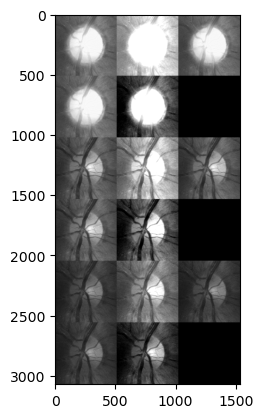

length:50---Drishti-GS/train/disc_small/image
length:51---Drishti-GS/test/disc_small/image
length:321---refuge/train/disc_small/image
Img_Name---n0246.png


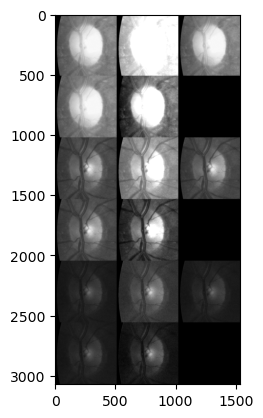

length:50---Drishti-GS/train/disc_small/image
length:51---Drishti-GS/test/disc_small/image
length:321---refuge/train/disc_small/image
Img_Name---n0044.png


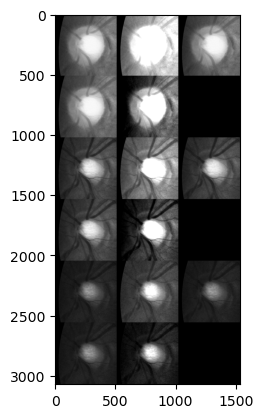

In [22]:
ImgEnhance_spilt_run(img_num=3,Mode_=["raw","bright","sharpness","color","contrast"],Factor=[1,2,2,2,2])

In [23]:
for index_ , num in enumerate([1,2,3]):
    print(index_)


0
1
2
